<a href="https://colab.research.google.com/github/will2bless1140/cpu-sheduling/blob/main/online_customer_conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
# this is a data set of Online shoppers
data = pd.read_csv('online_shoppers_intention 2.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [82]:
# checking the shape of the dataset
data.shape

(12330, 18)

In [83]:
#check the type of data we have
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [84]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [85]:
# checking for number of null value
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [86]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
data.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [87]:
# Normalized value counts # to show the count in percentage
percentage_counts = data['Revenue'].value_counts(normalize=True) * 100
print(percentage_counts)


False    84.525547
True     15.474453
Name: Revenue, dtype: float64


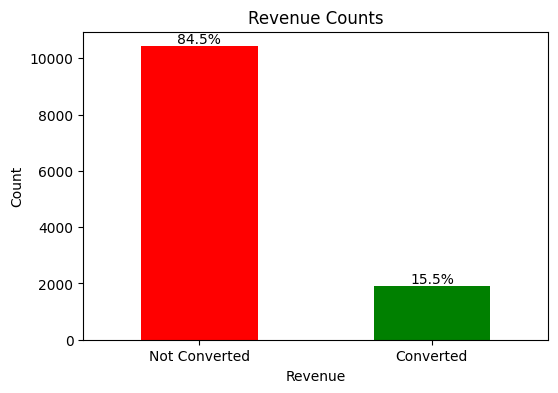

In [88]:
# viewing our target variable for converted and not converted
import pandas as pd
import matplotlib.pyplot as plt

# Calculating the value counts and percentages for the 'Revenue' column
value_counts = data['Revenue'].value_counts()
percentages = (value_counts / value_counts.sum()) * 100

# Creating the bar graph with percentages
plt.figure(figsize=(6, 4))
plot = value_counts.plot(kind='bar', color=['red', 'green'])

# Adding percentage labels to the bars
for i, v in enumerate(value_counts):
    plot.text(i, v, f"{percentages[i]:.1f}%", ha='center', va='bottom')

# Adding labels and title
plt.title('Revenue Counts')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Converted', 'Converted'], rotation=0)

plt.show()


from the plot and the count we can see we have so much more not converted than converted. meaning that this is unbalanced

In [89]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [90]:
# this is to check the category of variables that are object in the dataset
categorical_features = data.dtypes[data.dtypes == 'object'].index
categorical_features

Index(['Month', 'VisitorType'], dtype='object')

In [91]:
# checking the unique values in month
data['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [92]:
# checking the unique values in visitortype
data['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [93]:
# checking the unique values in weekend
data['Weekend'].unique()

array([False,  True])

In [94]:
# checking the unique values in Revenue
data['Revenue'].unique()

array([False,  True])

In [95]:
# checking the unique values in month
data['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

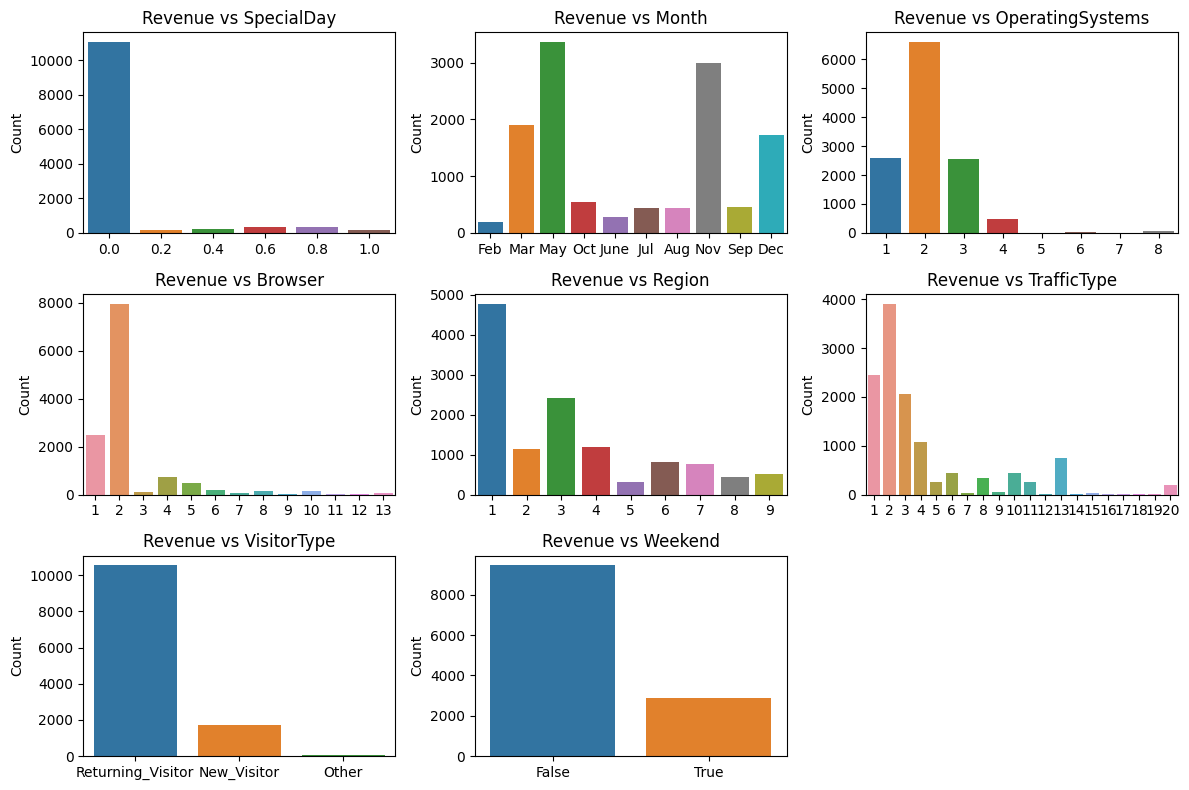

In [96]:
# comparing customer variables with the traget variables
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical customer variables to be compared
customer_variables = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

# Creating count plots for 'Revenue' against each categorical customer variable
plt.figure(figsize=(12, 8))
plot_num = 1  # Counter for subplots

for i in customer_variables:
    plt.subplot(3, 3, plot_num)
    sns.countplot(x=i, data=data)
    plt.title(f'Revenue vs {i}')
    plt.xlabel('')
    plt.ylabel('Count')
    plot_num += 1

plt.tight_layout()
plt.show()


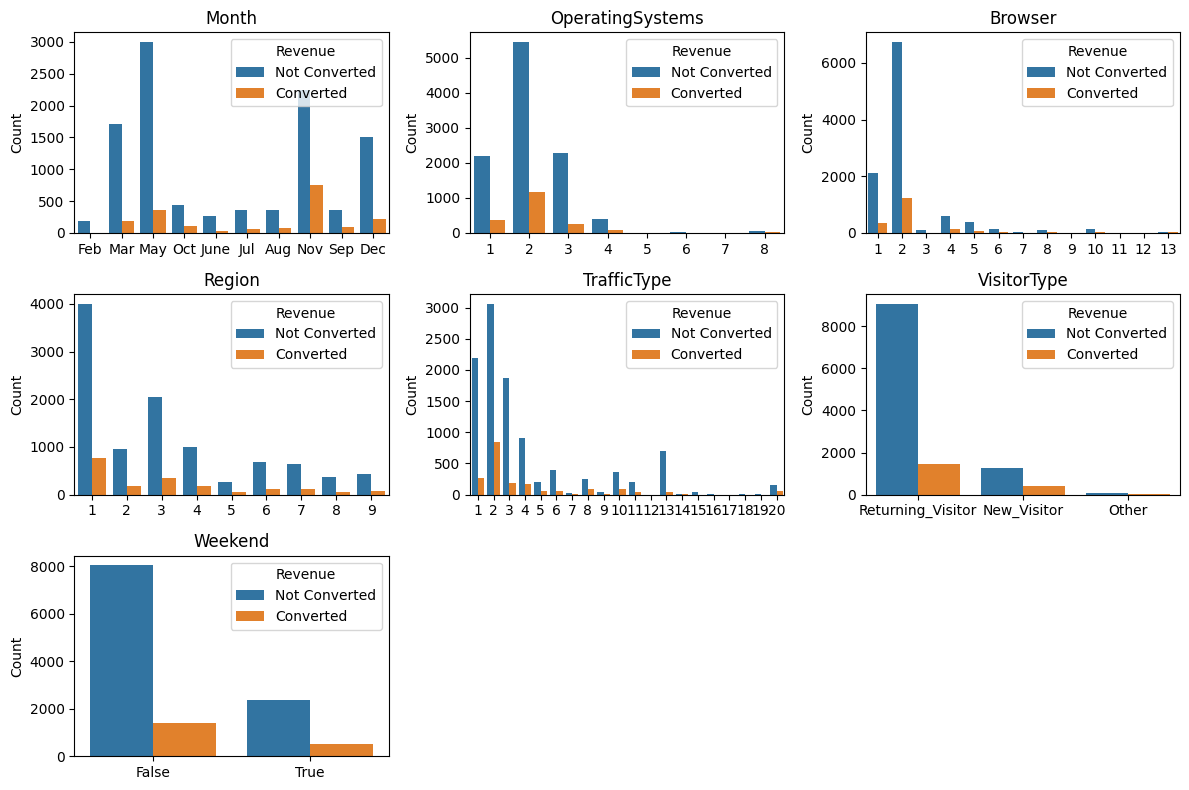

In [97]:
# comparing customer variables with the traget variables to know the converted and not converted ratio

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into two subsets: converted and non-converted customers
converted_customers = data[data['Revenue'] == 1]
non_converted_customers = data[data['Revenue'] == 0]

# List of categorical customer variables to compare with bar plots
customer_variables = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

# Create count plots for categorical customer variables
plt.figure(figsize=(12, 8))
plot_num = 1

for i in customer_variables:
    plt.subplot(3, 3, plot_num)
    sns.countplot(x=i, hue='Revenue', data=data)
    plt.title(i)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.legend(title='Revenue', labels=['Not Converted', 'Converted'])
    plot_num += 1

plt.tight_layout()
plt.show()


In [98]:
# machine learning only accept numbers, or int or floats. it doesnt accept string or alphabet. so now we will have to encoding to change the strings to int. we will perform level encoding
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
data['Month']= le1.fit_transform(data['Month'])
data['VisitorType']= le1.fit_transform(data['VisitorType'])
data['Weekend']= le1.fit_transform(data['Weekend'])
data['Revenue']= le1.fit_transform(data['Revenue'])

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Now we can see that all our datatype is in intgers and float which is suatable for machine learning

In [100]:
data.shape

(12330, 18)

In [101]:
#This is to drop duplicates
data=data.drop_duplicates()
data.shape

(12205, 18)

In [102]:
# we can see that we have droped 125 duplicate datas

In [103]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [104]:

data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942,5.168046,2.124211,2.357804,3.153298,4.073904,1.715936,0.234248,0.156329
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666,2.374071,0.906823,1.710114,2.402340,4.016654,0.693425,0.423545,0.363182
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


In [105]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [106]:
# Finding the correlation between our independent variables
corr_matrix = data.corr()
corr_matrix

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951,0.047651,-0.006586,-0.025622,-0.007262,-0.034643,-0.023492,0.023825,0.136330
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666,0.028408,-0.007529,-0.015742,-0.006729,-0.014991,-0.022407,0.013259,0.091768
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350,0.019146,-0.009721,-0.038787,-0.030317,-0.035197,0.057319,0.034359,0.093626
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261,0.005589,-0.009734,-0.019573,-0.027891,-0.025126,0.045596,0.023193,0.069358
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839,0.069523,0.004194,-0.013586,-0.040108,-0.044223,0.129521,0.013477,0.156042
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923,-0.038122,0.060447,0.002870,-0.007724,-0.034869,-0.037390,0.121887,0.004903,0.150077
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799,0.088626,-0.018898,0.026811,-0.015501,0.002787,0.089184,0.132442,-0.034808,-0.145091
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627,0.117176,-0.035594,0.016345,-0.003323,-0.000987,0.087478,0.177935,-0.053061,-0.204320
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000,-0.064481,0.021322,0.018632,0.045908,0.010588,0.012286,-0.110323,0.010801,0.491894
SpecialDay,-0.096951,-0.074666,-0.049350,-0.031261,-0.025839,-0.038122,0.088626,0.117176,-0.064481,1.000000,0.078991,0.012806,0.003528,-0.016450,0.052856,0.086615,-0.017723,-0.083601


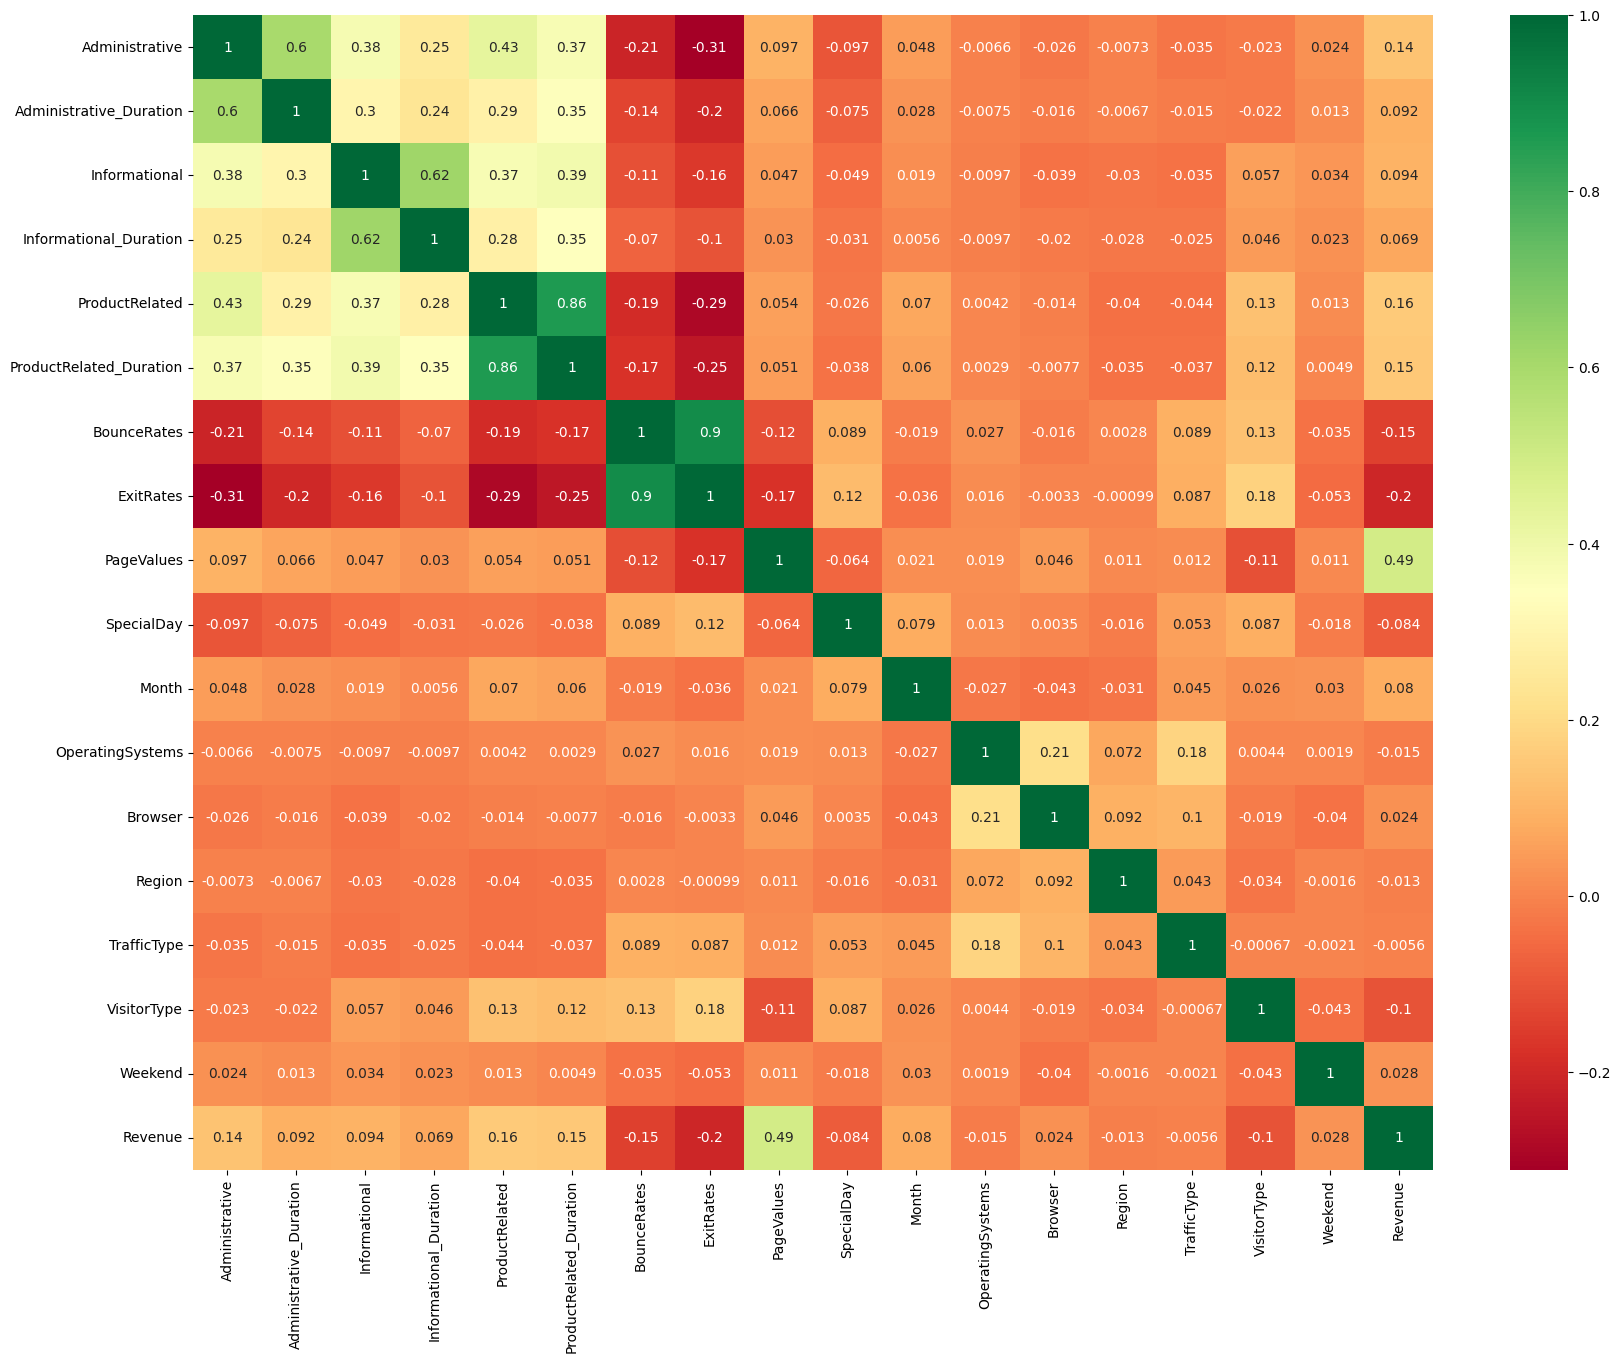

In [107]:
# viewing it in form of a heatmap
import seaborn as sns
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,15))
# plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

From the heatmap we can see that pagevalues have high corrolation with our target value which is the revenue. the one closest to it is the productrelated

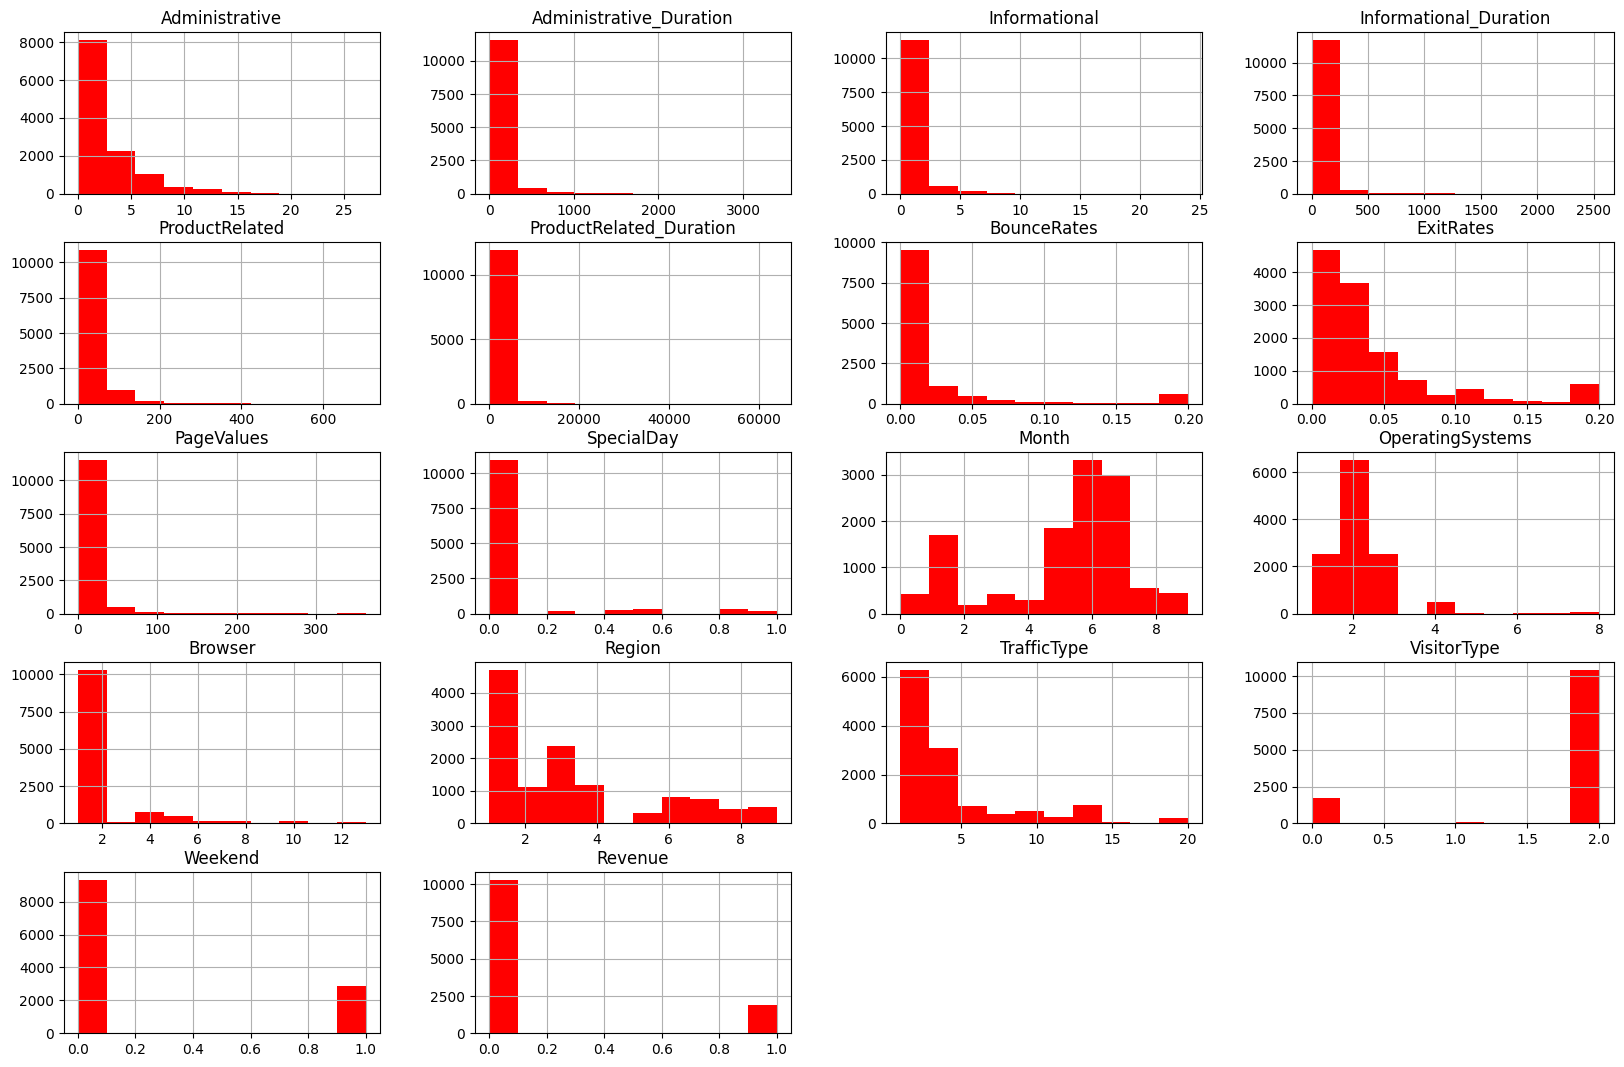

In [108]:
# histogram helps to understand the range, frequency, and patterns of values in the data
# this shows how the data is being distrubuted
data.hist(bins=10, figsize=(20,13), color='Red')
plt.show()

In [109]:
# now we will have to choose our x and y. we will use rain tomorrow as our y because that is the out put and that will be what we are predicting.
y = data['Revenue']
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12205, dtype: int64


In [110]:
# this is the x columns after dropping the y
X = data.drop(['Revenue'], axis =1)
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,2,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,2,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,2,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,2,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0


In [111]:
# it is important because when we are plotting our graph the data need to be in range. so the range has to be within +3 to -3
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
ssx = scaler.transform(X)
# ssx means standard scaler for x
ssx

array([[-0.70230237, -0.46001931, -0.3988242 , ..., -0.76532112,
         0.40967016, -0.55308794],
       [-0.70230237, -0.46001931, -0.3988242 , ..., -0.51634748,
         0.40967016, -0.55308794],
       [-0.70230237, -0.46001931, -0.3988242 , ..., -0.26737383,
         0.40967016, -0.55308794],
       ...,
       [-0.70230237, -0.46001931, -0.3988242 , ...,  2.22236264,
         0.40967016,  1.80803074],
       [ 0.49879066, -0.03744737, -0.3988242 , ...,  1.72441534,
         0.40967016, -0.55308794],
       [-0.70230237, -0.46001931, -0.3988242 , ..., -0.51634748,
        -2.4746819 ,  1.80803074]])

In [112]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier



# Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


In [113]:
# Random seed for for our result to be reproducable
np.random.seed(42)

# Spliting into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(ssx, y, test_size=0.2, random_state=42)


# Printing the sizes of the sets
print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Train set size: 9764
Test set size: 2441


In [114]:
# Putting our machine models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "Naive Bayes": GaussianNB(),
          "Support Vector Machine": SVC(),
          "XGBoost": XGBClassifier()}

# Creating function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fiting and evaluating given machine learning models.

    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Making a dictionary to keep model scores
    model_scores = {}
    # Looping through models
    for model_name, model in models.items():
        # Fit the model to the training data
        model.fit(X_train, y_train)
        # Evaluate the model on the test data
        test_score = model.score(X_test, y_test)
        # Save the validation and test scores for the model
        model_scores[model_name] = {"Test Acuracy Score": (test_score)*100}
    return model_scores

# Using the function with train and test sets
model_scores = fit_and_score(models, X_train,  X_test, y_train,  y_test)
model_scores


{'KNN': {'Test Acuracy Score': 87.75092175337976},
 'Logistic Regression': {'Test Acuracy Score': 88.77509217533797},
 'Random Forest': {'Test Acuracy Score': 90.41376485047113},
 'Naive Bayes': {'Test Acuracy Score': 80.70462925030725},
 'Support Vector Machine': {'Test Acuracy Score': 89.55346169602622},
 'XGBoost': {'Test Acuracy Score': 89.75829578041787}}

In [115]:
# Calculating and print the classification report for each model
for model_name, model in models.items():
    # Getting the predictions for the test data
    y_pred = model.predict(X_test)
    # Calculating the classification report
    classification_rep = classification_report(y_test, y_pred)
    # Printing the model name and classification report
    print(f"Model: {model_name}")
    print(classification_rep)
    print()



Model: KNN
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2079
           1       0.66      0.36      0.47       362

    accuracy                           0.88      2441
   macro avg       0.78      0.66      0.70      2441
weighted avg       0.86      0.88      0.86      2441


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2079
           1       0.75      0.36      0.49       362

    accuracy                           0.89      2441
   macro avg       0.82      0.67      0.71      2441
weighted avg       0.88      0.89      0.87      2441


Model: Random Forest
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2079
           1       0.74      0.54      0.63       362

    accuracy                           0.90      2441
   macro avg       0.83      0.76      0.79      2441
weighted avg 

We can see that random forest has the best model here , followed by support vector machine, then XGboot

In [116]:
# Showing the confusion matrix for all the models
# Using the function with train and test sets
model_scores = fit_and_score(models, X_train, X_test, y_train,  y_test)

# Printing the confusion matrices for each model
for model_name, model in models.items():
    # Getting the predictions for the test data
    y_pred = model.predict(X_test)
    # Calculating the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Printing the model name and confusion matrix
    print(f"Confusion Matrix - {model_name}:")
    print(cm)
    print()


Confusion Matrix - KNN:
[[2012   67]
 [ 232  130]]

Confusion Matrix - Logistic Regression:
[[2035   44]
 [ 230  132]]

Confusion Matrix - Random Forest:
[[2010   69]
 [ 165  197]]

Confusion Matrix - Naive Bayes:
[[1728  351]
 [ 120  242]]

Confusion Matrix - Support Vector Machine:
[[2025   54]
 [ 201  161]]

Confusion Matrix - XGBoost:
[[1994   85]
 [ 165  197]]



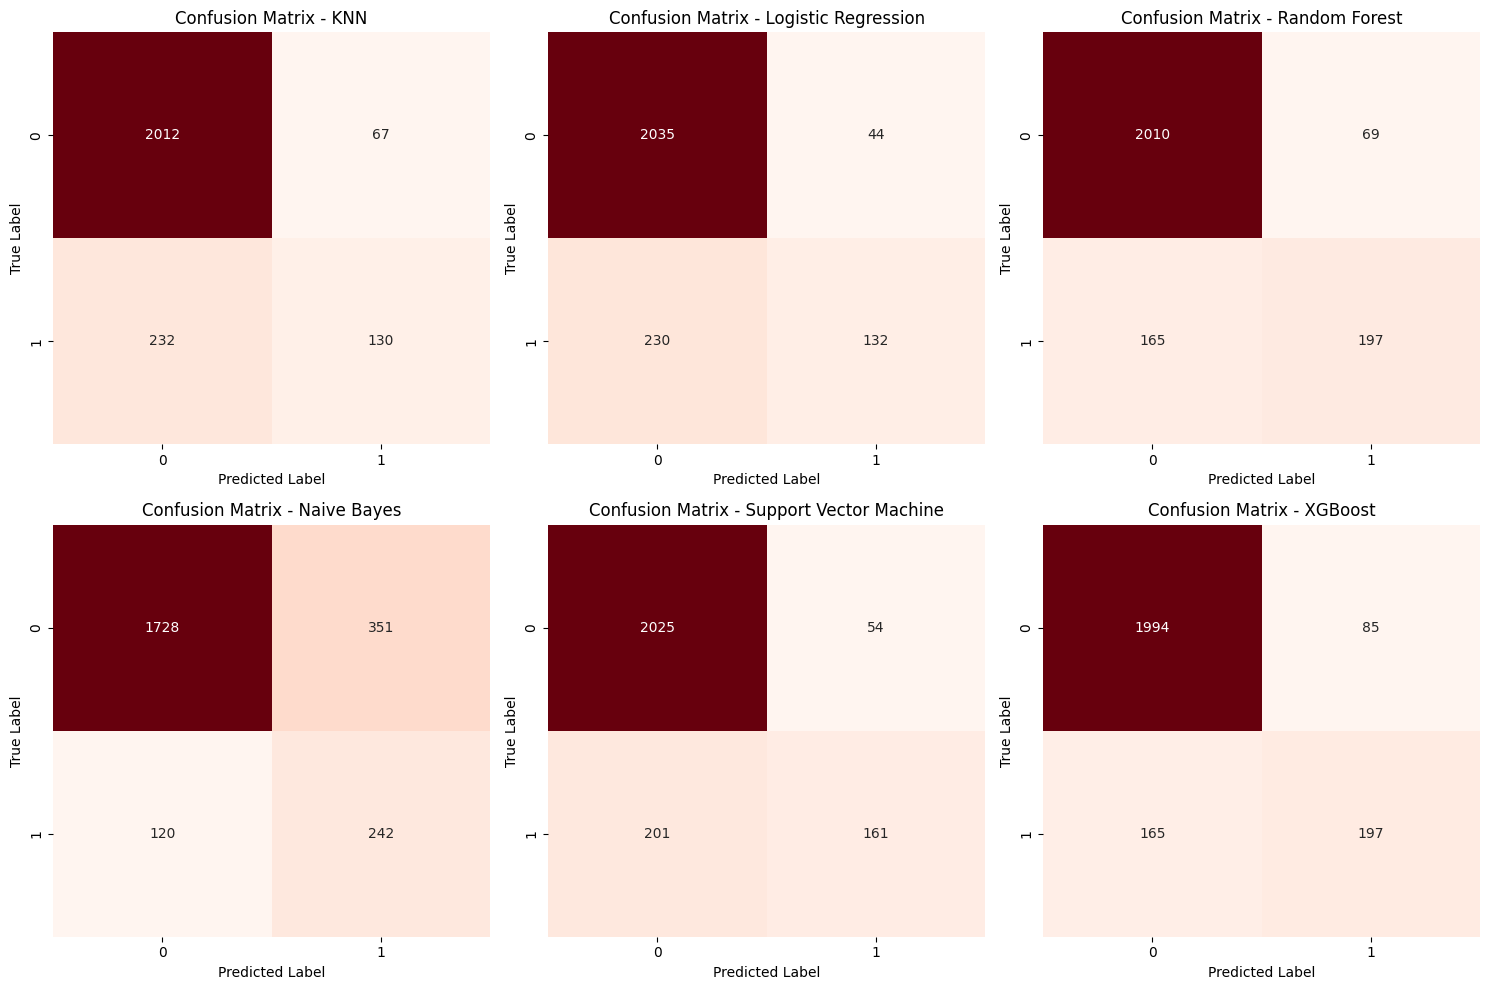

In [117]:
# Plotting confusion matrix for each model
plt.figure(figsize=(15, 10))
plot_num = 1
for (model_name, model) in models.items():
    plt.subplot(2, 3, plot_num)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plot_num += 1

plt.tight_layout()
plt.show()


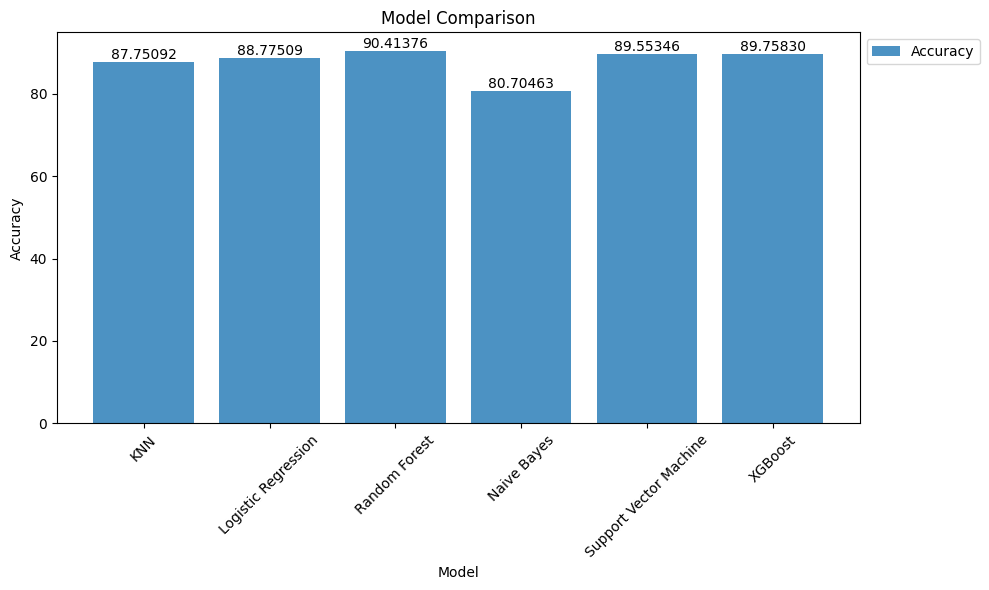

In [118]:
# visualizing the model comparison
import matplotlib.pyplot as plt

# Plotting model comparison using bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_scores.keys(), [score["Test Acuracy Score"] for score in model_scores.values()], label='Accuracy', alpha=0.8)

#adding exact text labels on top of each bar
def adding_label_to_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.5f}', ha='center', va='bottom')

adding_label_to_bars(bars)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)

# Moving the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


## since our dataset is imblance we will try for undersampling to see if we can get better result


In [119]:
# Counting the number of samples for each class in the original training set
class_counts_original = y_train.value_counts()
class_counts_original

0    8218
1    1546
Name: Revenue, dtype: int64

In [120]:
# balancing the data with random undersampling method
from imblearn.under_sampling import RandomUnderSampler

# Creating an instance of RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)

# Performing undersampling
x_und, y_und = undersampler.fit_resample(ssx, y)


In [121]:
# count after undersampling
y_und.value_counts()

0    1908
1    1908
Name: Revenue, dtype: int64

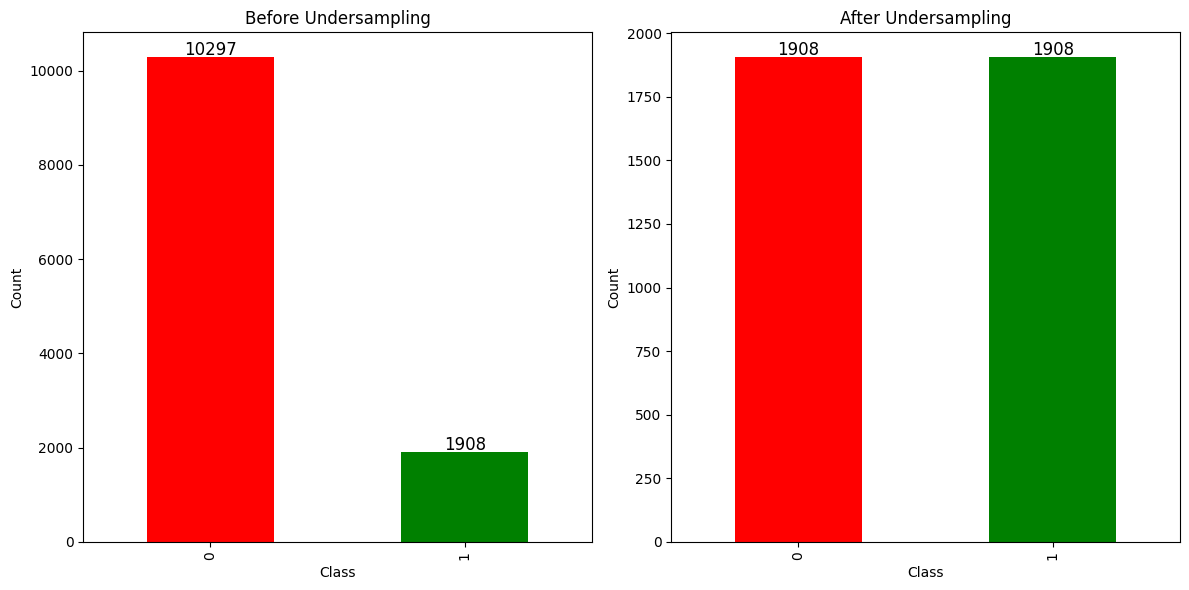

In [122]:
# showing the plot before undersampling and after under sampling
import matplotlib.pyplot as plt

# Function to add count labels on top of the bars
def adding_count_labels(w):
    for p in w.patches:
        w.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Ploting the value counts with a bar graph before undersampling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax1 = pd.Series(y).value_counts().plot(kind="bar", color=["red", "green"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Before Undersampling")
adding_count_labels(ax1)

# Ploting the value counts with a bar graph after undersampling
plt.subplot(1, 2, 2)
ax2 = pd.Series(y_und).value_counts().plot(kind="bar", color=["red", "green"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("After Undersampling")
adding_count_labels(ax2)

plt.tight_layout()
plt.show()


In [123]:
# Random seed for for our result to be reproducable
np.random.seed(42)

# Spliting into train, validation, and test sets
X_und_train, X_und_test, y_und_train, y_und_test = train_test_split(x_und, y_und, test_size=0.2, random_state=42)


# Printing the sizes of the sets
print("Train set size:", X_und_train.shape[0])
print("Test set size:", X_und_test.shape[0])


Train set size: 3052
Test set size: 764


In [124]:
# Putting our machine models in a dictionary
models_und = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "Naive Bayes": GaussianNB(),
          "Support Vector Machine": SVC(),
          "XGBoost": XGBClassifier()}

# Creating function to fit and score models
def fit_and_score(models_und, X_und_train, X_und_test, y_und_train, y_und_test):
    """
    Fiting and evaluating given machine learning models.

    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Making a dictionary to keep model scores
    model_und_scores = {}
    # Looping through models
    for model_und_name, model_und in models_und.items():
        # Fit the model to the training data
        model_und.fit(X_und_train, y_und_train)
        # Evaluate the model on the test data
        test_und_score = model_und.score(X_und_test, y_und_test)
        # Save the validation and test scores for the model
        model_und_scores[model_und_name] = {"Test Accuracy Score": test_und_score}
    return model_und_scores

# Using the function with train, validation, and test sets
model_und_scores = fit_and_score(models_und, X_und_train,  X_und_test, y_und_train,  y_und_test)
model_und_scores

{'KNN': {'Test Accuracy Score': 0.7526178010471204},
 'Logistic Regression': {'Test Accuracy Score': 0.819371727748691},
 'Random Forest': {'Test Accuracy Score': 0.856020942408377},
 'Naive Bayes': {'Test Accuracy Score': 0.7447643979057592},
 'Support Vector Machine': {'Test Accuracy Score': 0.8272251308900523},
 'XGBoost': {'Test Accuracy Score': 0.8468586387434555}}

In [125]:
# Calculating and printing the classification report for each model
for model_und_name, model_und in models_und.items():
    # Getting the predictions for the test data
    y_und_pred = model_und.predict(X_und_test)
    # Calculating the classification report
    classification_und_rep = classification_report(y_und_test, y_und_pred)
    # Printing the model name and classification report
    print(f"Model: {model_und_name}")
    print(classification_und_rep)
    print()


Model: KNN
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       391
           1       0.75      0.73      0.74       373

    accuracy                           0.75       764
   macro avg       0.75      0.75      0.75       764
weighted avg       0.75      0.75      0.75       764


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       391
           1       0.86      0.75      0.80       373

    accuracy                           0.82       764
   macro avg       0.82      0.82      0.82       764
weighted avg       0.82      0.82      0.82       764


Model: Random Forest
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       391
           1       0.85      0.86      0.85       373

    accuracy                           0.86       764
   macro avg       0.86      0.86      0.86       764
weighted avg 

In [126]:
# Using the function with train, validation, and test sets
model_und_scores = fit_and_score(models_und, X_und_train, X_und_test, y_und_train,  y_und_test)

# Print the confusion matrices for each model
for model_und_name, model_und in models_und.items():
    # Get the predictions for the test data
    y_und_pred = model_und.predict(X_und_test)
    # Calculate the confusion matrix
    cm_und = confusion_matrix(y_und_test, y_und_pred)
    # Print the model name and confusion matrix
    print(f"Confusion Matrix - {model_und_name}:")
    print(cm_und)
    print()

Confusion Matrix - KNN:
[[301  90]
 [ 99 274]]

Confusion Matrix - Logistic Regression:
[[346  45]
 [ 93 280]]

Confusion Matrix - Random Forest:
[[333  58]
 [ 52 321]]

Confusion Matrix - Naive Bayes:
[[260 131]
 [ 64 309]]

Confusion Matrix - Support Vector Machine:
[[342  49]
 [ 83 290]]

Confusion Matrix - XGBoost:
[[327  64]
 [ 53 320]]



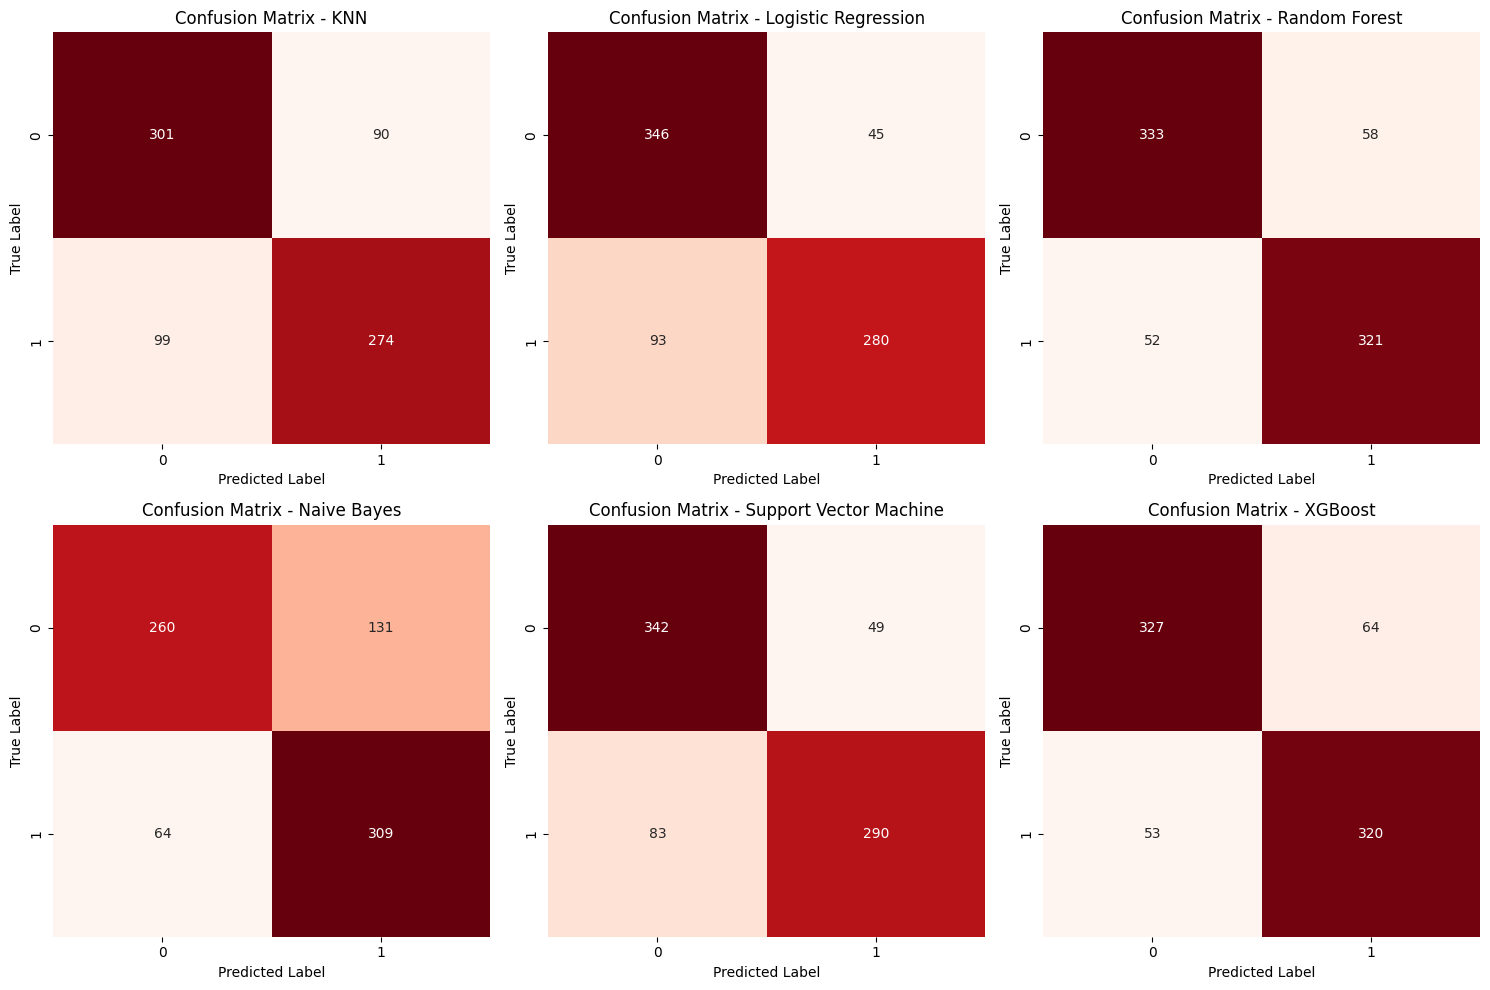

In [127]:
# Plotting confusion matrix for each model
plt.figure(figsize=(15, 10))
plot_num =1
for (model_und_name, model_und) in models_und.items():
    plt.subplot(2, 3, plot_num)
    y_und_pred = model_und.predict(X_und_test)
    cm = confusion_matrix(y_und_test, y_und_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
    plt.title(f'Confusion Matrix - {model_und_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plot_num += 1

plt.tight_layout()
plt.show()

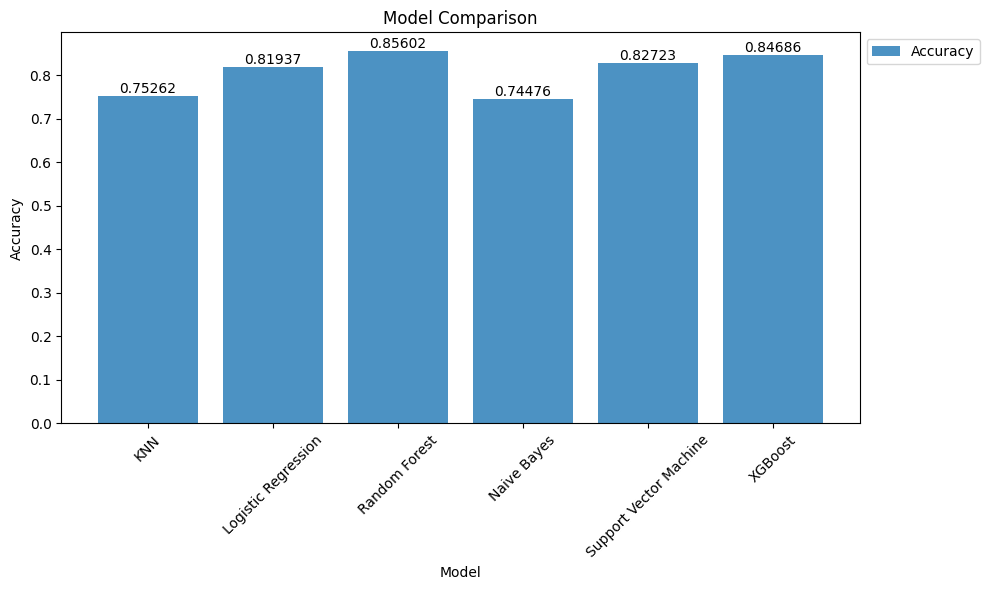

In [128]:
# visualizing model comparison
import matplotlib.pyplot as plt

# Plotting model comparison using bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_und_scores.keys(), [score["Test Accuracy Score"] for score in model_und_scores.values()], label='Accuracy', alpha=0.8)

# Adding exact text labels on top of each bar
def add_labels_on_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.5f}', ha='center', va='bottom')

add_labels_on_bars(bars)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)

# Moving the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


## we can see that the result is poorer so now we will try oversampling

## Now lets try our model for over sampling because our data is unblanced

In [129]:
# Counting the number of samples for each class in the original training set
class_counts_original = y_train.value_counts()
class_counts_original

0    8218
1    1546
Name: Revenue, dtype: int64

In [130]:
# using SMOTE over sampling
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
x_ovr, y_ovr = oversample.fit_resample(ssx,y)

In [131]:
# after over sampling
y_ovr.value_counts()

0    10297
1    10297
Name: Revenue, dtype: int64

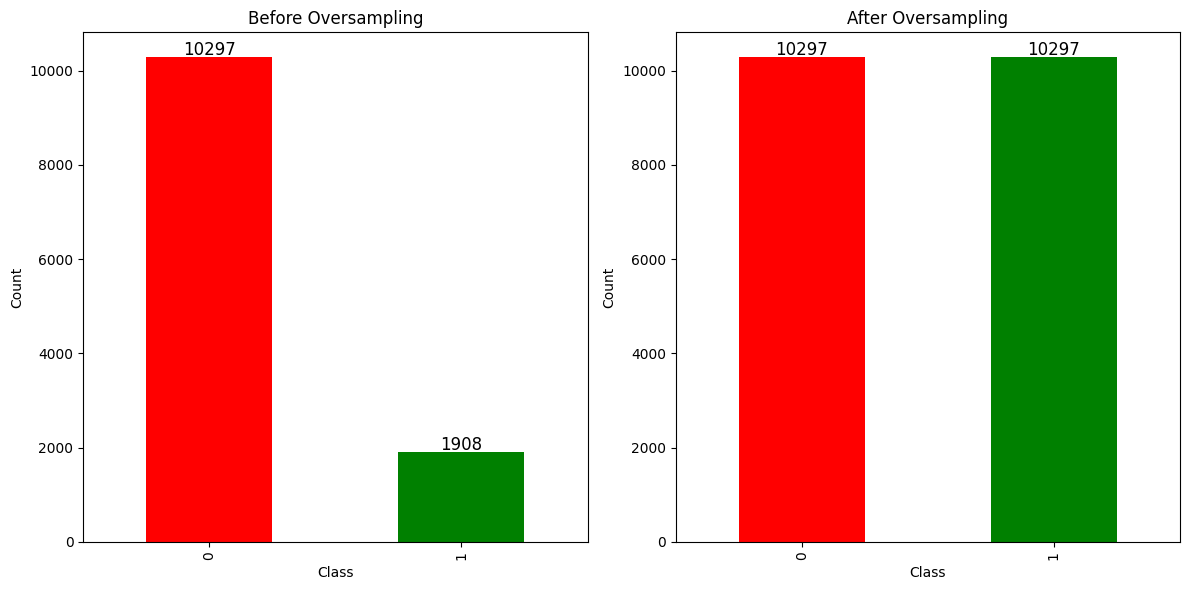

In [132]:
# showing the plot after over sampling
import matplotlib.pyplot as plt

# adding count labels on top of the bars
def adding_count_labels(w):
    for p in w.patches:
        w.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Plot the value counts with a bar graph before oversampling
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ax1 = pd.Series(y).value_counts().plot(kind="bar", color=["red", "green"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Before Oversampling")
adding_count_labels(ax1)

# Plot the value counts with a bar graph after oversampling
plt.subplot(1, 2, 2)
ax2 = pd.Series(y_ovr).value_counts().plot(kind="bar", color=["red", "green"])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("After Oversampling")
adding_count_labels(ax2)

plt.tight_layout()
plt.show()


## we can see now that our dataset is balanced

## spliting the dataset after over sampling

In [133]:
# Random seed for for our result to be reproducable
np.random.seed(42)

# Spliting into train, validation, and test sets
X_ovr_train, X_ovr_test, y_ovr_train, y_ovr_test = train_test_split(x_ovr, y_ovr, test_size=0.2, random_state=42)


# Printing the sizes of the sets
print("Train set size:", X_ovr_train.shape[0])
print("Test set size:", X_ovr_test.shape[0])


Train set size: 16475
Test set size: 4119


In [134]:
# Putting our machine models in a dictionary
models_ovr = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "Naive Bayes": GaussianNB(),
          "Support Vector Machine": SVC(),
          "XGBoost": XGBClassifier()}

# Creating function to fit and score models
def fit_and_score(models_ovr, X_ovr_train, X_ovr_test, y_ovr_train, y_ovr_test):
    """
    Fiting and evaluating given machine learning models.

    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Making a dictionary to keep model scores
    model_ovr_scores = {}
    # Looping through models
    for model_ovr_name, model_ovr in models_ovr.items():
        # Fit the model to the training data
        model_ovr.fit(X_ovr_train, y_ovr_train)
        # Evaluate the model on the test data
        test_ovr_score = model_ovr.score(X_ovr_test, y_ovr_test)
        # Save the validation and test scores for the model
        model_ovr_scores[model_ovr_name] = {"Test Accuracy Score": test_ovr_score}
    return model_ovr_scores

# Using the function with train, validation, and test sets
model_ovr_scores = fit_and_score(models_ovr, X_ovr_train,  X_ovr_test, y_ovr_train,  y_ovr_test)
model_ovr_scores

{'KNN': {'Test Accuracy Score': 0.875455207574654},
 'Logistic Regression': {'Test Accuracy Score': 0.8298130614226754},
 'Random Forest': {'Test Accuracy Score': 0.9361495508618597},
 'Naive Bayes': {'Test Accuracy Score': 0.7436270939548434},
 'Support Vector Machine': {'Test Accuracy Score': 0.8635591162903618},
 'XGBoost': {'Test Accuracy Score': 0.9417334304442826}}

In [135]:
# Calculate and print the classification report for each model
for model_ovr_name, model_ovr in models_ovr.items():
    # Get the predictions for the test data
    y_ovr_pred = model_ovr.predict(X_ovr_test)
    # Calculate the classification report
    classification_ovr_rep = classification_report(y_ovr_test, y_ovr_pred)
    # Print the model name and classification report
    print(f"Model: {model_ovr_name}")
    print(classification_ovr_rep)
    print()


Model: KNN
              precision    recall  f1-score   support

           0       0.97      0.77      0.86      2038
           1       0.81      0.98      0.89      2081

    accuracy                           0.88      4119
   macro avg       0.89      0.87      0.87      4119
weighted avg       0.89      0.88      0.87      4119


Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      2038
           1       0.88      0.77      0.82      2081

    accuracy                           0.83      4119
   macro avg       0.84      0.83      0.83      4119
weighted avg       0.84      0.83      0.83      4119


Model: Random Forest
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      2038
           1       0.92      0.95      0.94      2081

    accuracy                           0.94      4119
   macro avg       0.94      0.94      0.94      4119
weighted avg 

In [136]:
# Using the function with train, validation, and test sets
model_ovr_scores = fit_and_score(models_ovr, X_ovr_train, X_ovr_test, y_ovr_train,  y_ovr_test)

# Print the confusion matrices for each model
for model_ovr_name, model_ovr in models_ovr.items():
    # Get the predictions for the test data
    y_ovr_pred = model_ovr.predict(X_ovr_test)
    # Calculate the confusion matrix
    cm_ovr = confusion_matrix(y_ovr_test, y_ovr_pred)
    # Print the model name and confusion matrix
    print(f"Confusion Matrix - {model_ovr_name}:")
    print(cm_ovr)
    print()

Confusion Matrix - KNN:
[[1575  463]
 [  50 2031]]

Confusion Matrix - Logistic Regression:
[[1825  213]
 [ 488 1593]]

Confusion Matrix - Random Forest:
[[1869  169]
 [  94 1987]]

Confusion Matrix - Naive Bayes:
[[1251  787]
 [ 269 1812]]

Confusion Matrix - Support Vector Machine:
[[1825  213]
 [ 349 1732]]

Confusion Matrix - XGBoost:
[[1931  107]
 [ 133 1948]]



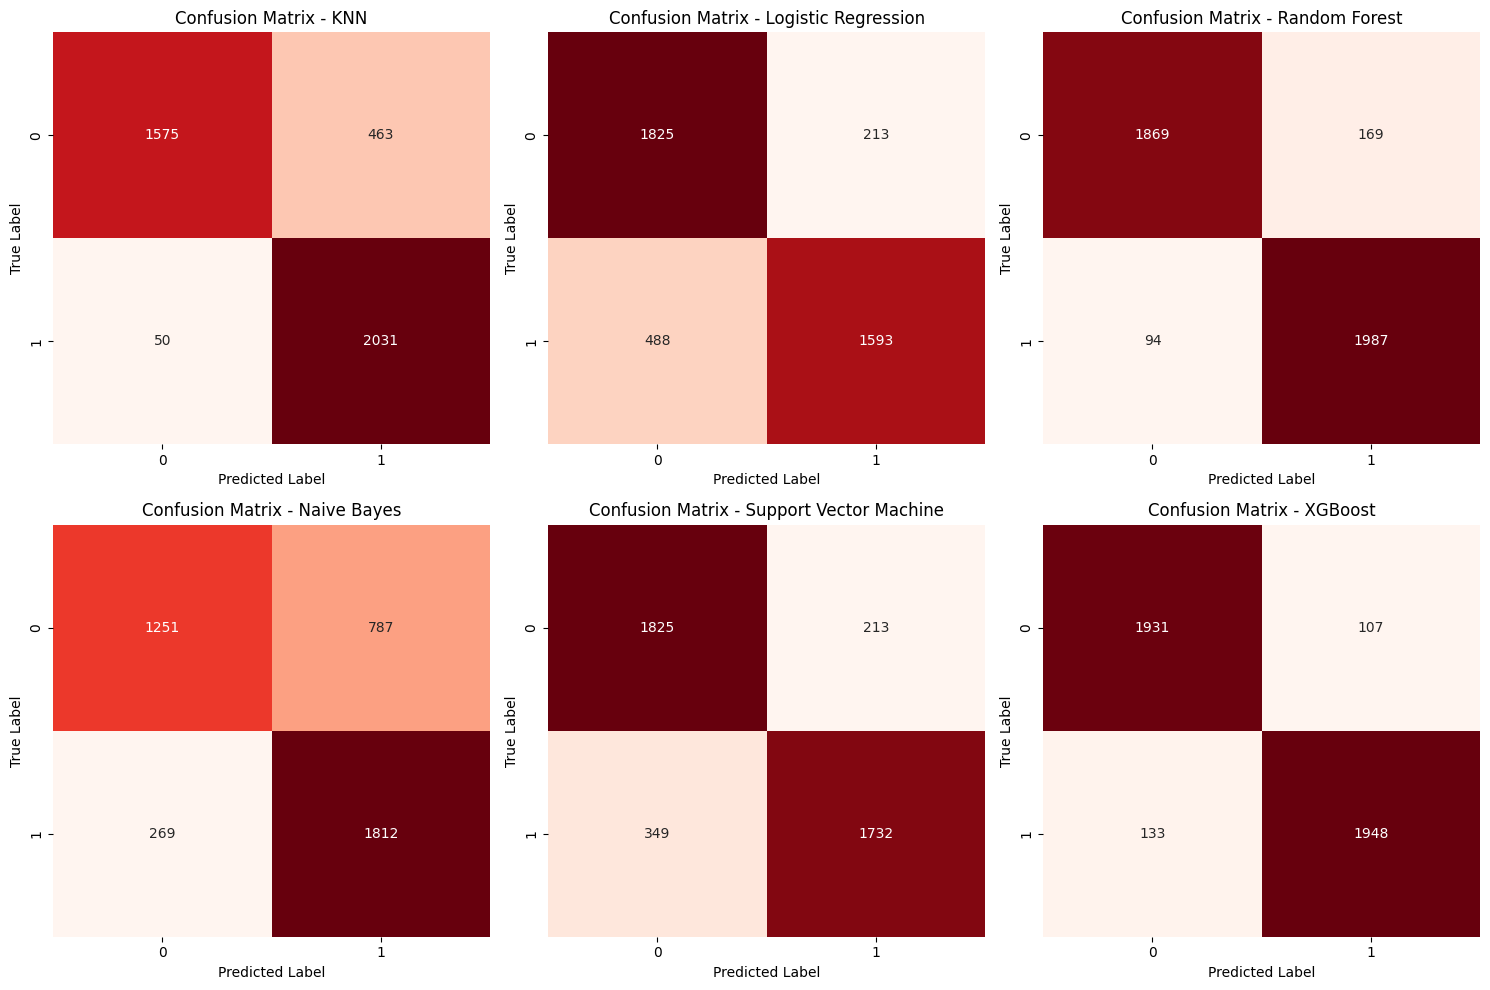

In [137]:
# Plotting confusion matrix for each model
plt.figure(figsize=(15, 10))
plot_num = 1
for (model_ovr_name, model_ovr) in models_ovr.items():
    plt.subplot(2, 3, plot_num)
    y_ovr_pred = model_ovr.predict(X_ovr_test)
    cm_ovr = confusion_matrix(y_ovr_test, y_ovr_pred)
    sns.heatmap(cm_ovr, annot=True, fmt='d', cmap='Reds', cbar=False)
    plt.title(f'Confusion Matrix - {model_ovr_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plot_num += 1

plt.tight_layout()
plt.show()

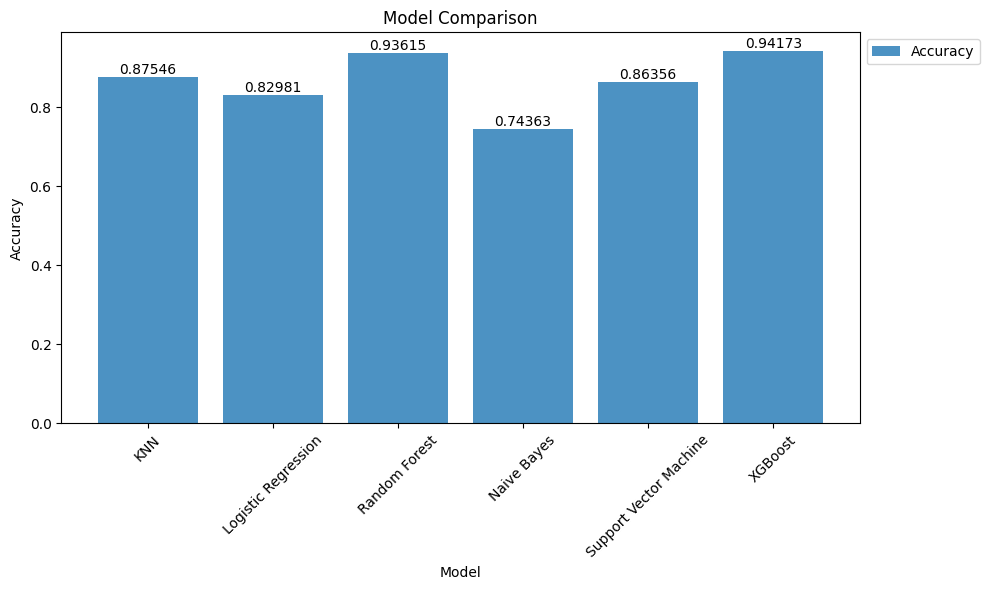

In [138]:
# visualizing model comaprison
import matplotlib.pyplot as plt

# Plotting model comparison using bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(model_ovr_scores.keys(), [score["Test Accuracy Score"] for score in model_ovr_scores.values()], label='Accuracy', alpha=0.8)

# Adding exact text labels on top of each bar
def add_labels_on_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.5f}', ha='center', va='bottom')

add_labels_on_bars(bars)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.xticks(rotation=45)

# Moving the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


# we can see that XGBOOST performs the best

## Now we will do Hyperparameter tunning to see if we can get a better result. we will be using Randomizedsearchcv

In [139]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Defining the hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Create the XGBoost model
xgb_model = XGBClassifier()

# Performing random search for XGBoost hyperparameters
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_grid, n_iter=10, cv=3, random_state=42)
xgb_random_search.fit(X_ovr_train, y_ovr_train)

# Getting the best XGBoost model and its scores
best_xgb_model = xgb_random_search.best_estimator_
best_xgb_scores = {
    "Test Score": best_xgb_model.score(X_ovr_test, y_ovr_test)
}

# Print the best XGBoost model and its scores
print("Best XGBoost Model:", best_xgb_model)
print("Best XGBoost Scores:", best_xgb_scores)


Best XGBoost Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Best XGBoost Scores: {'Test Score': 0.9429473173100267}


## now we will be trying Gridsearchcv hyperparameter tuning

In [140]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100,200,300,400,500],
    'max_depth': [7],
    'learning_rate': [0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.8]
}

# Creating the XGBoost model
xgb_model = XGBClassifier()

# Performing grid search for XGBoost hyperparameters
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3)
xgb_grid_search.fit(X_ovr_train, y_ovr_train)

# Getting the best XGBoost model and its scores
best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_scores = {
    "Test Score": best_xgb_model.score(X_ovr_test, y_ovr_test)
}

# Print the best XGBoost model and its scores
print("Best XGBoost Model:", best_xgb_model)
print("Best XGBoost Scores:", best_xgb_scores)


Best XGBoost Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Best XGBoost Scores: {'Test Score': 0.9393056567127943}


## we have gotten our accuracy, now we will be getting the
confusion matrix, classification report, cross validation, Roc curve, Auc curve

Confusion Matrix:
[[1914  124]
 [ 126 1955]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2038
           1       0.94      0.94      0.94      2081

    accuracy                           0.94      4119
   macro avg       0.94      0.94      0.94      4119
weighted avg       0.94      0.94      0.94      4119



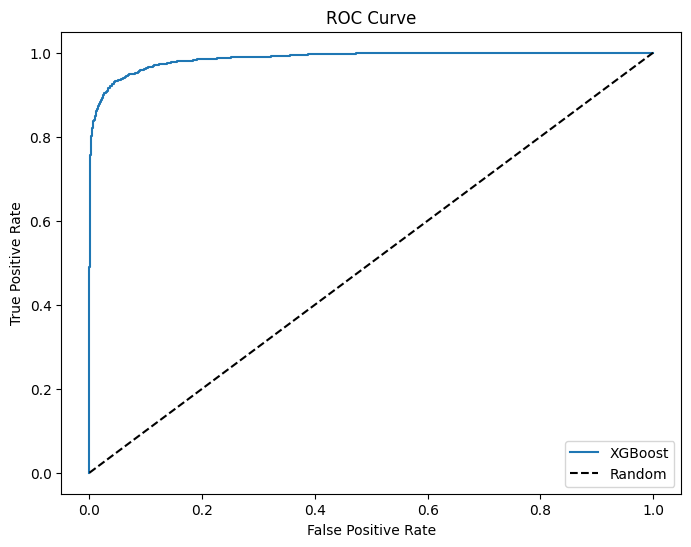

Area Under the Curve (AUC): 0.9868450898568712


In [141]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns



# Making predictions on the test set
y_pred = best_xgb_model.predict(X_ovr_test)

# Confusion matrix
confusion_mat = confusion_matrix(y_ovr_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

# Classification report
classification_rep = classification_report(y_ovr_test, y_pred)
print('Classification Report:')
print(classification_rep)


# ROC curve
y_pred_proba = best_xgb_model.predict_proba(X_ovr_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_ovr_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Area Under the Curve (AUC)
auc_score = roc_auc_score(y_ovr_test, y_pred_proba)
print('Area Under the Curve (AUC):', auc_score)


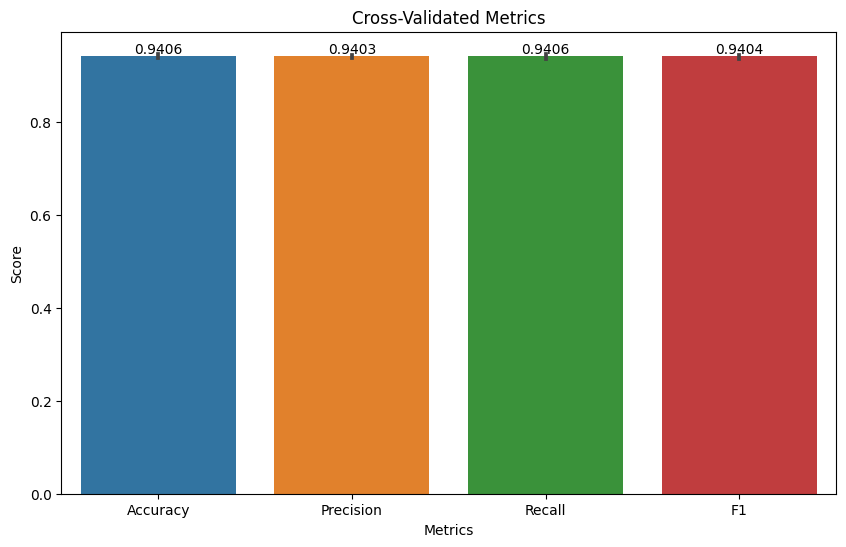

In [142]:
# Calculating cross-validated metrics
cv_scores = cross_val_score(best_xgb_model, X_ovr_train, y_ovr_train, cv=5, scoring='accuracy')
cv_precision = cross_val_score(best_xgb_model, X_ovr_train, y_ovr_train, cv=5, scoring='precision')
cv_recall = cross_val_score(best_xgb_model, X_ovr_train, y_ovr_train, cv=5, scoring='recall')
cv_f1 = cross_val_score(best_xgb_model, X_ovr_train, y_ovr_train, cv=5, scoring='f1')

# Creating a DataFrame of cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_scores,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1})

# Plotting the cross-validated metrics with exact scores on top of the bars
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=cv_metrics)
plt.title('Cross-Validated Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')

# Adding text annotations with the exact scores on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


## Feature importance to know how important each feature is to the prediction gotten

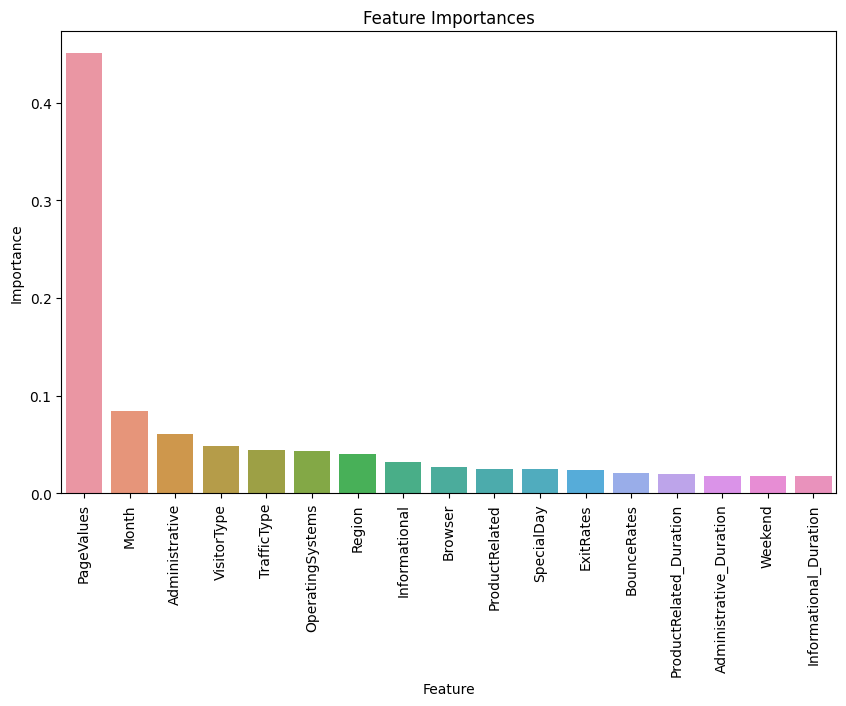

In [143]:
# Getting feature importances
feature_importances = best_xgb_model.feature_importances_

# Creating a DataFrame of feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importances_df)
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation='vertical')
plt.show()


## from this we can see that pagevalues has a high impact to the prediction result , followed by the month